## Objectives
### 1. Problem understanding
### 2. Gathering Data
### 3. Exploratory data analysis
### 4. Data preprocessing 
### 5. Choosing a model, Training and testing the model on data
### 6. Perform Model Comparison
### 7. Evaluation 
<hr>

### Imported necessary libraries

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from imblearn.pipeline import make_pipeline as ib_make_pipeline 

import warnings
warnings.filterwarnings('ignore')

### 1. Problem understanding

* <font color='red'>**Predict if the server will be hacked**</font>

* <font color='green'>All the countries across the globe have adapted to means of digital payments. And with increased volume of digital payments, hacking has become a pretty common event wherein the hacker can try to hack your details just with your number linked to your bank account. However, there is data with some anonymized variables based on which one can predict that the hack is going to happen.
* Our work is to build a predictive model which can identify a pattern in these variables and suggest that a hac is going to happen so that the cyber security can somehow stop it before it actually happens. You have to predict the column:'MALICIOUS_OFFENSE'.</font>

### 2. Gathering Data

In [3]:
train_data = pd.read_csv('train.csv',index_col='INCIDENT_ID')

In [4]:
test_data = pd.read_csv('test.csv',index_col='INCIDENT_ID')

#### * Download Dataset <a href="https://github.com/taruntiwarihp/Projects_DS/tree/master/Hack%20Prediction">click here</a>

* Use "**index_col**" Make passed "INCIDENT_ID" column as index instead pf 0 column.

### 3. Exploratory Data Analysis(EDA)

In [5]:
train_data.head()

,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
INCIDENT_ID,,,,,,,,,,,,,,,,,
CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [6]:
test_data.head()

,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
INCIDENT_ID,,,,,,,,,,,,,,,,
CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


* To take a closer look at the data i took help of "**.head()**" function of pandas library which returns first five observations of the dataset.

I found out the total number of rows and columns in the data set using "**.shape**"

In [7]:
train_data.shape

(23856, 17)

* Data set comprises of 23856 observations and 17 features(columns).
* Out of which one is dependent variable and rest 16 are independent variables

* Percentage and rows divided into Train and Test data

In [8]:
nrow_train=train_data.shape[0]
nrow_test=test_data.shape[0]
sum=nrow_train+nrow_test
print("       : Train : Test")
print("rows   :",nrow_train,":",nrow_test)
print("perc   :",round(nrow_train*100/sum),"   :",round(nrow_test*100/sum))

       : Train : Test
rows   : 23856 : 15903
perc   : 60    : 40


 Let's find out the columns and their corresponding data types, along with finding whether they contain null values or not.

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23856 entries, CR_102659 to CR_22575
Data columns (total 17 columns):
DATE                23856 non-null object
X_1                 23856 non-null int64
X_2                 23856 non-null int64
X_3                 23856 non-null int64
X_4                 23856 non-null int64
X_5                 23856 non-null int64
X_6                 23856 non-null int64
X_7                 23856 non-null int64
X_8                 23856 non-null int64
X_9                 23856 non-null int64
X_10                23856 non-null int64
X_11                23856 non-null int64
X_12                23674 non-null float64
X_13                23856 non-null int64
X_14                23856 non-null int64
X_15                23856 non-null int64
MULTIPLE_OFFENSE    23856 non-null int64
dtypes: float64(1), int64(15), object(1)
memory usage: 3.3+ MB


* This data has object, float and integer values.
* "X_12" This column is containing null/missing values and this column is need to be convert float to int. Except this column there is no missing values. 
* Target variable "**MULTIPLE_OFFENSE**"

The "**describe()**"" function in pandas is very hanly in getting various summary statistics. This function returns the count, mean, standard deviation, minimum and maximum valus and the quantiles of the data.

In [10]:
train_data.describe()#include='all'

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


* Here as you can notice mean value is higher than median value of each column which is represented by 50% (50th percentile) in index column.
* There is notaly a large difference between 75th %tile and max values of predictors except "**X_9**" column
* Thus observations 1 and 2 suggest that there are extreme values- Outliers in our data set.

In [11]:
train_data['MULTIPLE_OFFENSE'].unique()

array([0, 1], dtype=int64)

* Target variable is descrete and categorical in nature
* "**MULTIPLE_OFFENSE**" indicates if the incident was hack, Its scale 0 and 1; where 1 is 'Yes' and 0 is 'No'

Now se is our target variable is imbalanced or not

In [12]:
train_data['MULTIPLE_OFFENSE'].value_counts()

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64

* "**MULTIPLE_OFFENSE**" 1 has 22788 observation and 0 has 1068. The data looks imbalance

In [13]:
train_data['MULTIPLE_OFFENSE'].value_counts()/train_data.shape[0]

1    0.955231
0    0.044769
Name: MULTIPLE_OFFENSE, dtype: float64

* Here We see that 95% of the data set belongs to 1 class. This means that even if we take a rough guess to target prediction as 1, **we'll get 95% accuracy**. Isn't that amazing? Let's create a cross tab of the target variable with edcation. With this, we'll try to understand the influence of education on the target variable

In [14]:
data = pd.crosstab(train_data['DATE'],train_data['MULTIPLE_OFFENSE'],margins=True)/train_data.shape[0]

In [15]:
data.sample(10)

MULTIPLE_OFFENSE,0,1,All
DATE,,,
29-AUG-94,0.0,0.000042,0.000042
10-FEB-12,0.0,0.000210,0.000210
16-MAR-06,0.0,0.000126,0.000126
02-MAR-92,0.0,0.000042,0.000042
24-FEB-01,0.0,0.000168,0.000168
07-JUL-05,0.0,0.000168,0.000168
05-JUN-13,0.0,0.000084,0.000084
12-SEP-04,0.0,0.000084,0.000084
27-JUN-94,0.0,0.000084,0.000084


#### Visualization target variable and some feature variables

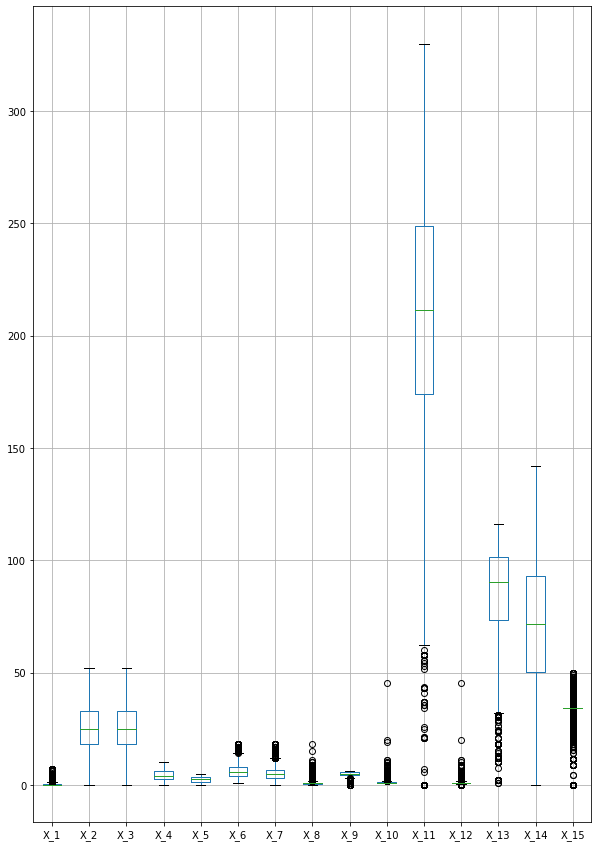

In [16]:
plt.figure(figsize=(10,15))
train_data.drop(columns='MULTIPLE_OFFENSE').groupby('DATE').mean().boxplot()

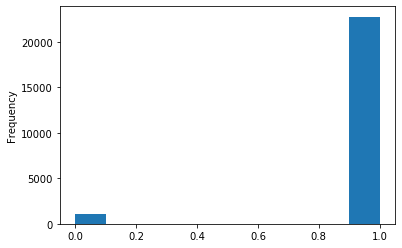

In [17]:
train_data['MULTIPLE_OFFENSE'].plot.hist() # target variable 

* **hist()** shows the number of elements in each container as a row vector.

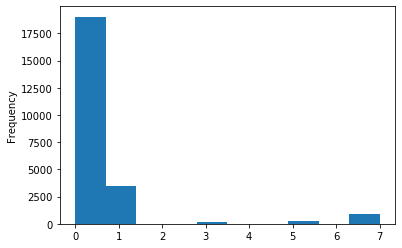

In [18]:
train_data['X_1'].plot.hist()

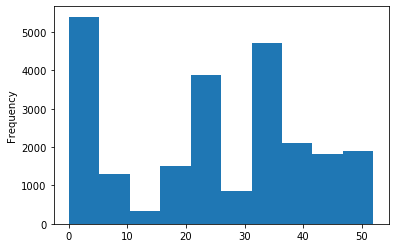

In [19]:
train_data['X_2'].plot.hist()

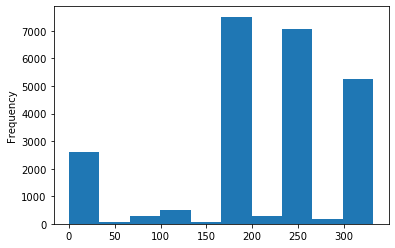

In [20]:
train_data['X_11'].plot.hist()

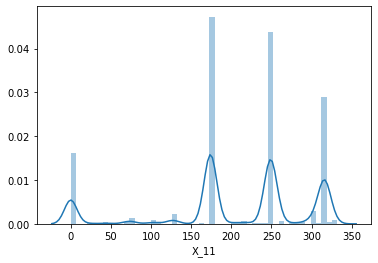

In [21]:
sns.distplot(train_data['X_11'])

* **distplot()** this function combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn kdeplot() and rugplot() functions

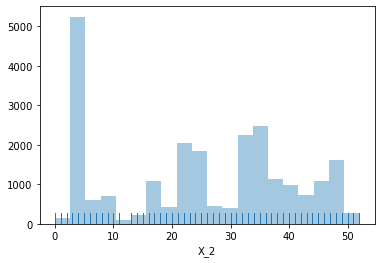

In [22]:
sns.distplot(train_data['X_2'], bins=20, kde=False, rug=True)

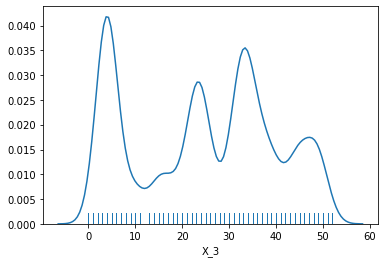

In [23]:
sns.distplot(train_data['X_3'], hist=False, rug=True)

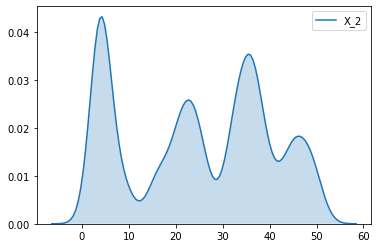

In [24]:
sns.kdeplot(train_data['X_2'], shade=True)

* **kdeplot()** described as Kernel Density Estimate is used for visualizing the Probability Density

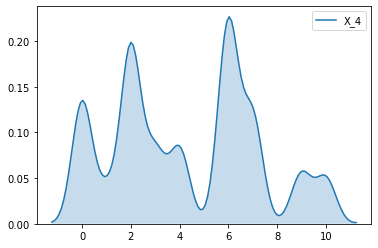

In [25]:
sns.kdeplot(train_data['X_4'], shade=True)

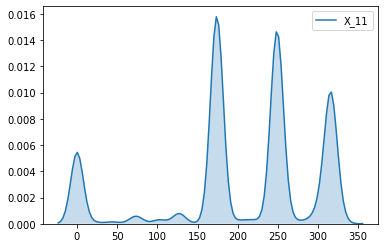

In [26]:
sns.kdeplot(train_data['X_11'], shade=True)

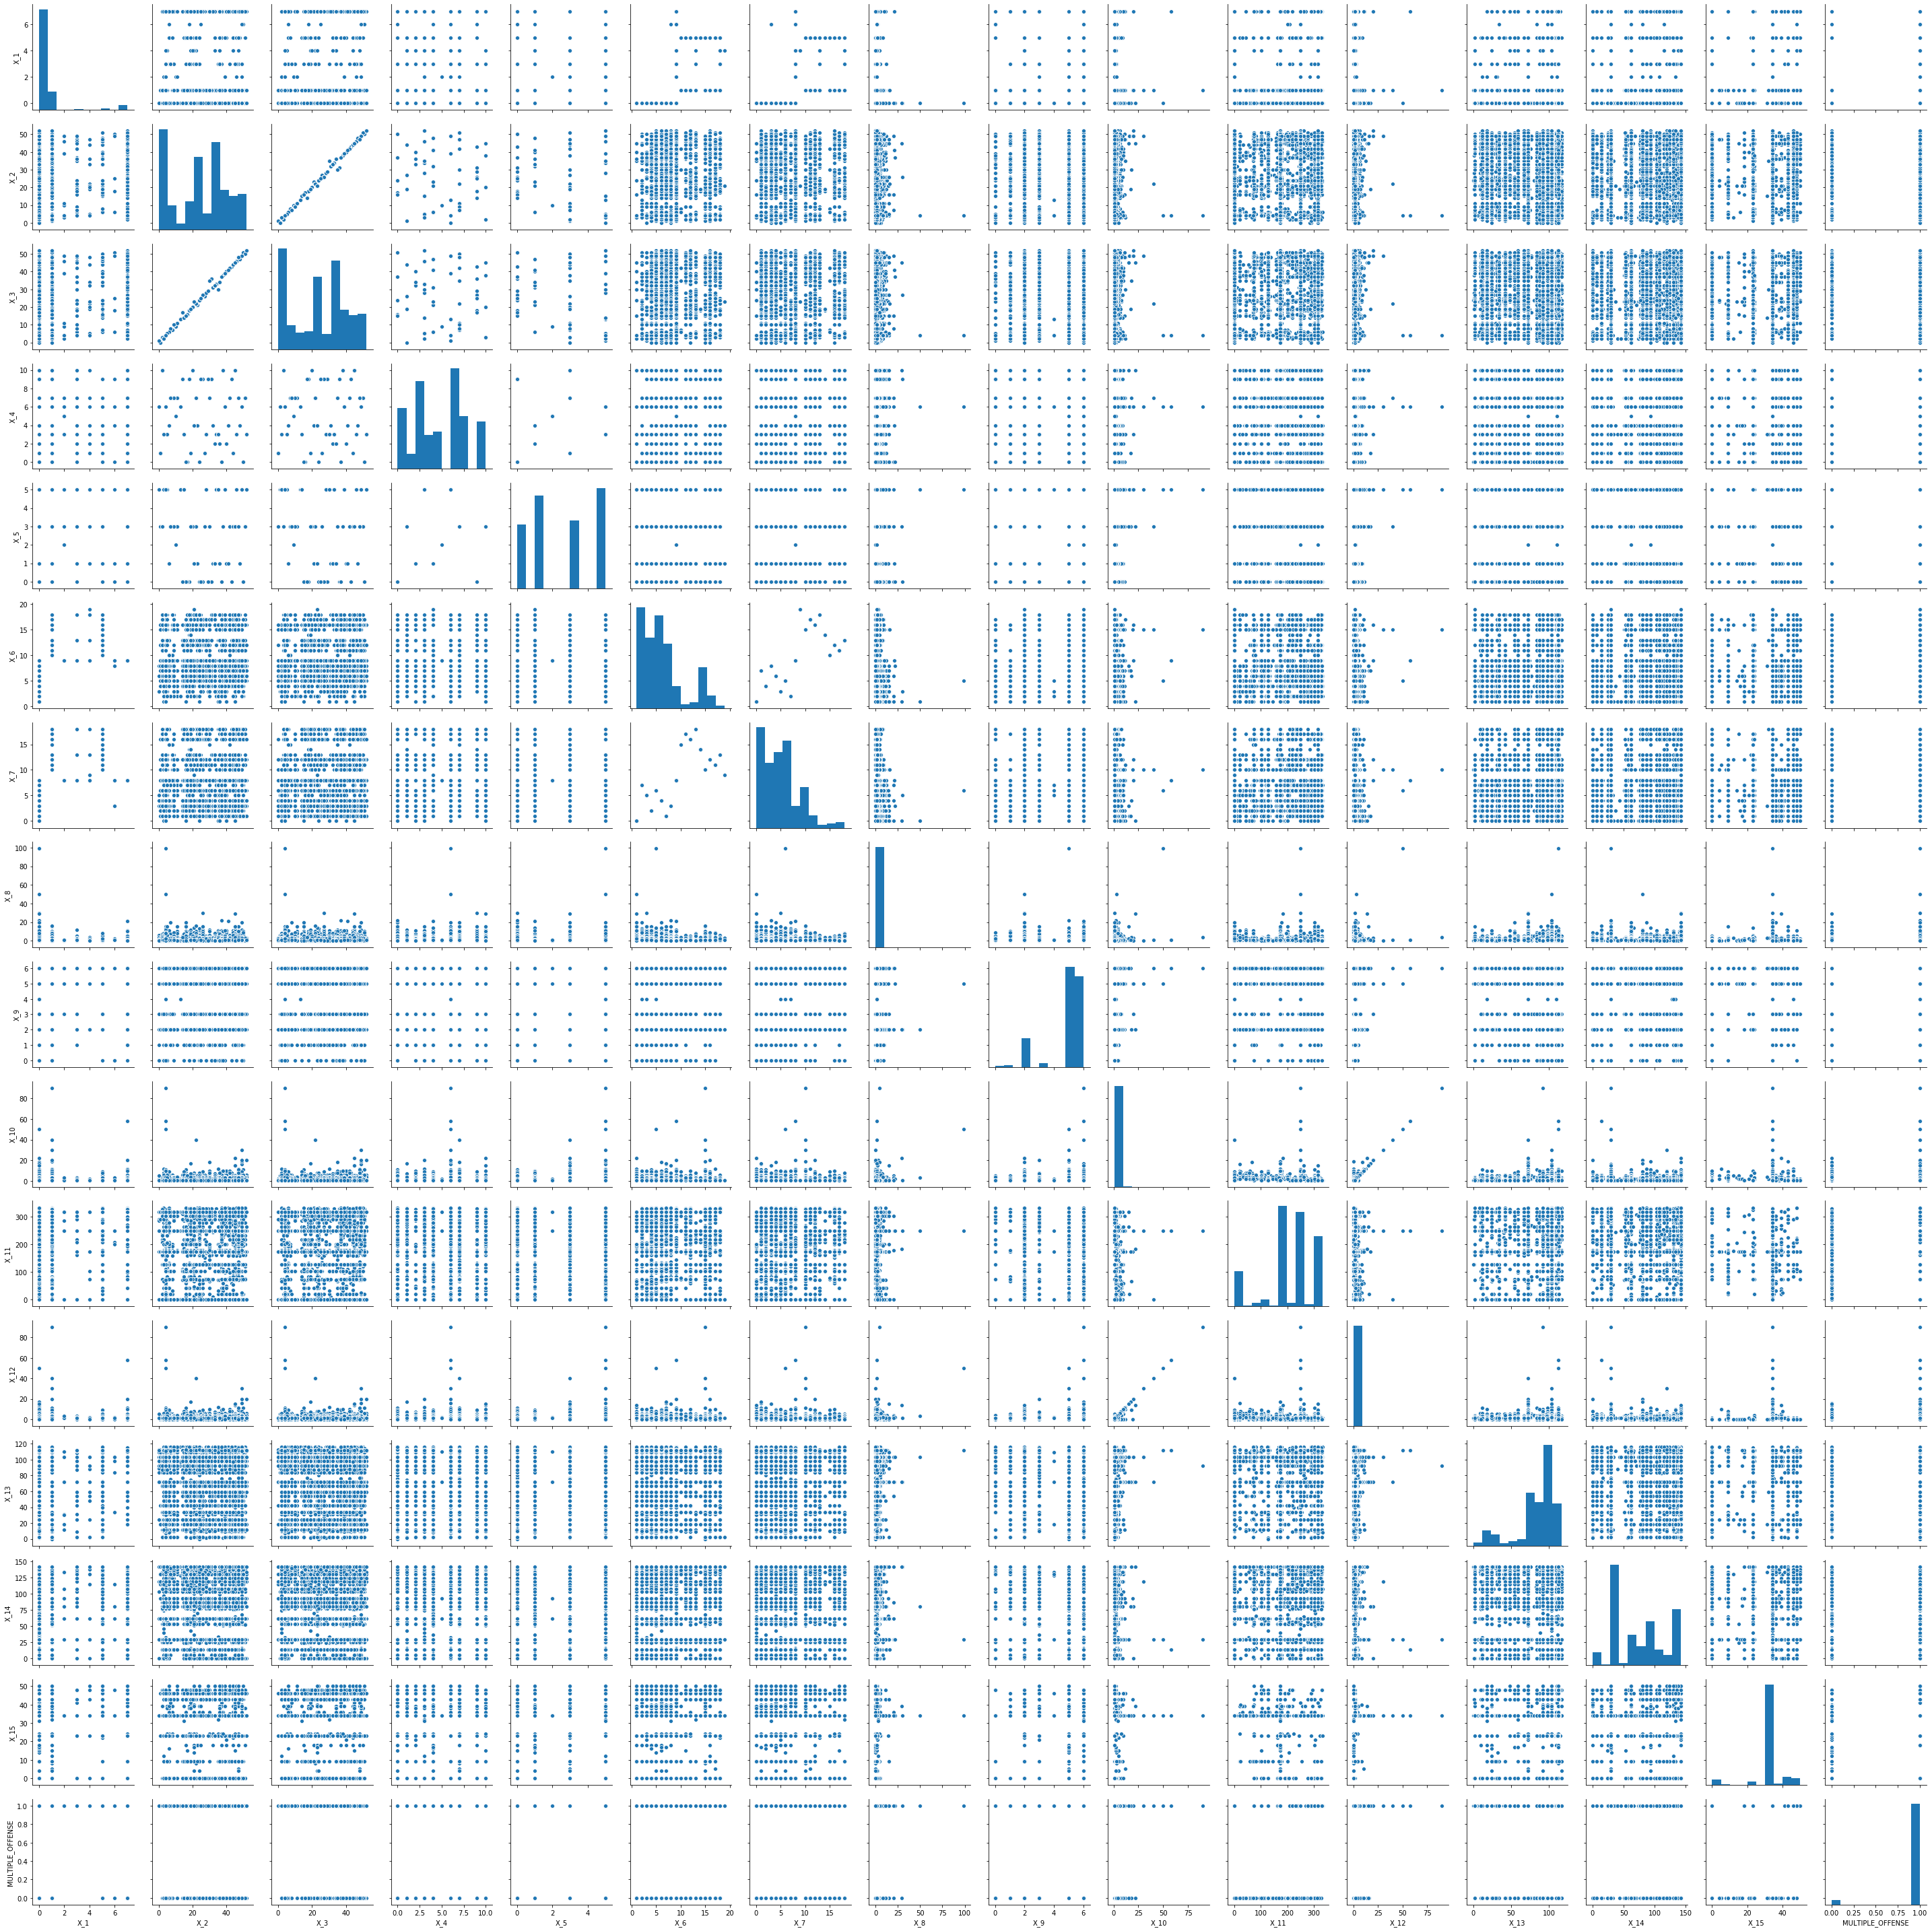

In [27]:
#visualize all features
sns.pairplot(train_data.drop(columns='DATE'))

* **box()** using boxplot for outliers 

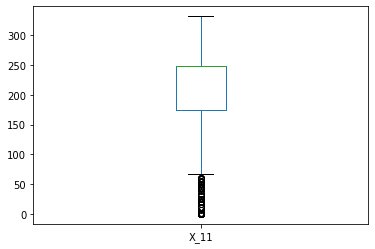

In [28]:
train_data['X_11'].plot.box()

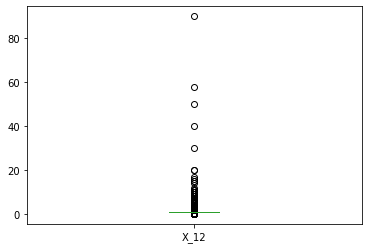

In [29]:
train_data['X_12'].plot.box()

### 4. Data pre-processing

In [30]:
#filling null values
train_data.X_12 = train_data.X_12.fillna(train_data['X_12'].median())
#typecasting
train_data.X_12  = train_data.X_12.astype('int64')

In [31]:
test_data.X_12 = test_data.X_12.fillna(test_data['X_12'].median())
#typecasting
test_data.X_12  = test_data.X_12.astype('int64')

* Here we are using Median to fill NaN values because the data having outliers, Typecaste float to int

#### * Spliting the data

In [32]:
feature_data = train_data.drop(columns=['DATE','MULTIPLE_OFFENSE'])
target_data = train_data['MULTIPLE_OFFENSE']

In [33]:
trainX, testX, trainY, testY = train_test_split(feature_data, target_data,)

### 5. Choosing a model, Training and testing the model on data

In [34]:
# To store the accuracy 
models_name,accuracy = [],[]

#### LogisticRegression

In [35]:
lr_pipeline = make_pipeline (MinMaxScaler(), LogisticRegression())

In [36]:
lr_pipeline.fit(trainX,trainY)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])

In [37]:
lr_pipeline.score(testX, testY)

0.9548960429242119

In [38]:
confusion_matrix(testY, lr_pipeline.predict(testX))

array([[   0,  269],
       [   0, 5695]], dtype=int64)

In [39]:
print("Precision = {}".format(precision_score(testY, lr_pipeline.predict(testX), average='macro')))
print("Recall = {}".format(recall_score(testY, lr_pipeline.predict(testX), average='macro')))
print("Accuracy = {}".format(accuracy_score(testY, lr_pipeline.predict(testX))))

Precision = 0.47744802146210596
Recall = 0.5
Accuracy = 0.9548960429242119


In [40]:
models_name.append("Logistic Regression")
accuracy.append(accuracy_score(testY, lr_pipeline.predict(testX)))

#### RandomForest Classifier

In [41]:
rf_pipeline = make_pipeline(MinMaxScaler(),RandomForestClassifier())

In [42]:
rf_pipeline.fit(trainX,trainY)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [43]:
rf_pipeline.score(testX, testY)

0.9914486921529175

In [44]:
confusion_matrix(testY, rf_pipeline.predict(testX))

array([[ 228,   41],
       [  10, 5685]], dtype=int64)

In [45]:
print("Precision = {}".format(precision_score(testY, rf_pipeline.predict(testX), average='macro')))
print("Recall = {}".format(recall_score(testY, rf_pipeline.predict(testX), average='macro')))
print("Accuracy = {}".format(accuracy_score(testY, rf_pipeline.predict(testX))))

Precision = 0.9754114359680303
Recall = 0.9229138584357895
Accuracy = 0.9914486921529175


In [46]:
models_name.append("RandomForestClassifier")
accuracy.append(accuracy_score(testY, rf_pipeline.predict(testX)))

#### DecisionTree Classifier

In [47]:
dt_pipeline = make_pipeline (MinMaxScaler(), DecisionTreeClassifier())

In [48]:
dt_pipeline.fit(trainX,trainY)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [49]:
dt_pipeline.score(testX, testY)

0.9983232729711603

In [50]:
confusion_matrix(testY, dt_pipeline.predict(testX))

array([[ 268,    1],
       [   9, 5686]], dtype=int64)

In [51]:
print("Precision = {}".format(precision_score(testY, dt_pipeline.predict(testX), average='macro')))
print("Recall = {}".format(recall_score(testY, dt_pipeline.predict(testX), average='macro')))
print("Accuracy = {}".format(accuracy_score(testY, dt_pipeline.predict(testX))))

Precision = 0.9836665928182522
Recall = 0.9973510971275266
Accuracy = 0.9983232729711603


In [52]:
models_name.append("DecisionTreeClassifier")
accuracy.append(accuracy_score(testY, dt_pipeline.predict(testX)))

#### Gaussian Naive Bayes

In [53]:
gnb_pipeline = make_pipeline (MinMaxScaler(), GaussianNB())

In [54]:
gnb_pipeline.fit(trainX,trainY)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('gaussiannb', GaussianNB())])

In [55]:
gnb_pipeline.score(testX, testY)

0.9475184439973172

In [56]:
confusion_matrix(testY, gnb_pipeline.predict(testX))

array([[  28,  241],
       [  72, 5623]], dtype=int64)

In [57]:
print("Precision = {}".format(precision_score(testY, gnb_pipeline.predict(testX), average='macro')))
print("Recall = {}".format(recall_score(testY, gnb_pipeline.predict(testX), average='macro')))
print("Accuracy = {}".format(accuracy_score(testY, gnb_pipeline.predict(testX))))

Precision = 0.6194508867667121
Recall = 0.5457232751614767
Accuracy = 0.9475184439973172


In [58]:
models_name.append("GaussainNB")
accuracy.append(accuracy_score(testY, gnb_pipeline.predict(testX)))

### 6. Perform Model Comparison

In [59]:
model_compare = pd.DataFrame({'models': models_name, 'accuracy': accuracy})
model_compare

,models,accuracy
0,Logistic Regression,0.954896
1,RandomForestClassifier,0.991449
2,DecisionTreeClassifier,0.998323
3,GaussainNB,0.947518


* **We can se that DecisionTreeClassifier model with the high accuracy**

### 7. Evaluation

* Creating a DecisionTreeClassifier model with imbalance data pipeline

In [60]:
b_dt_pipeline = ib_make_pipeline(MinMaxScaler(), DecisionTreeClassifier())

In [61]:
b_dt_pipeline.fit(trainX,trainY)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [62]:
b_dt_pipeline.score(testX,testY)

0.9984909456740443

In [63]:
confusion_matrix(testY, b_dt_pipeline.predict(testX))

array([[ 268,    1],
       [   8, 5687]], dtype=int64)

In [64]:
recall_score(testY, b_dt_pipeline.predict(testX), average='macro')

0.9974388934400815

In [65]:
print("Precision = {}".format(precision_score(testY, b_dt_pipeline.predict(testX), average='macro')))
print("Recall = {}".format(recall_score(testY, b_dt_pipeline.predict(testX), average='macro')))
print("Accuracy = {}".format(accuracy_score(testY, b_dt_pipeline.predict(testX))))

Precision = 0.9854193420167554
Recall = 0.9974388934400815
Accuracy = 0.9984909456740443


In [66]:
models_name.append("Imblearn_decisionTree")
accuracy.append((accuracy_score(testY, b_dt_pipeline.predict(testX))))

### * Models comparision 

In [67]:
model_compare = pd.DataFrame({'models': models_name, 'accuracy': accuracy})
model_compare

,models,accuracy
0,Logistic Regression,0.954896
1,RandomForestClassifier,0.991449
2,DecisionTreeClassifier,0.998323
3,GaussainNB,0.947518
4,Imblearn_decisionTree,0.998491


#### Conclusion

* **If we compare the sklearn DecisonTreepipeline and imbalanceLearn DecisionTreepipeline than the imbalance pipeline is getting high acuracy than sklearn pipeline.**

In [68]:
pd.read_csv('sample_submission.csv')

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,0
2,.,.
3,.,.
4,CR_196089,1
5,CR_112195,0
6,CR_149832,1


**Submission**

In [69]:
test_prediction = b_dt_pipeline.predict(test_data.drop(columns='DATE'))

In [70]:
submission = pd.DataFrame({"INCIDENT_ID":test_data.index,"MULTIPLE_OFFENSE":test_prediction})

In [73]:
submission.to_csv("hack_prediction.csv",index=False)

In [74]:
pd.read_csv('hack_prediction.csv')

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1
...,...,...
15898,CR_44468,1
15899,CR_158460,1
15900,CR_115946,1
15901,CR_137663,1
